In [5]:
from difference_models import TwoClassDifferenceClassifier
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
%matplotlib inline

In [2]:
with open('dataset.pickle', 'rb') as f:
    X, y, feature_names, n_features, n_samples = pickle.load(f)
with open('classifiers.pickle', 'rb') as f:
    clf_a, clf_b = pickle.load(f)

### Differences of predicted labels

First, let's see to what extent the predicted labels are different:

In [6]:
simple_diff_clf = TwoClassDifferenceClassifier(clf_a, clf_b)
simple_diff_clf.fit(X, y)

TwoClassDifferenceClassifier(clf_a=RuleClassifier(decision_rule=<function <lambda> at 0x119441a60>),
                             clf_b=RuleClassifier(decision_rule=<function <lambda> at 0x119441d30>))

In [7]:
is_pred_equal = simple_diff_clf.predict(X)
np.sum(is_pred_equal)

810

In [8]:
is_pred_different = ~is_pred_equal
np.sum(is_pred_different)

90

Let's investigate the predicted labels in more detail, using adapted classical tools for classification evaluation:

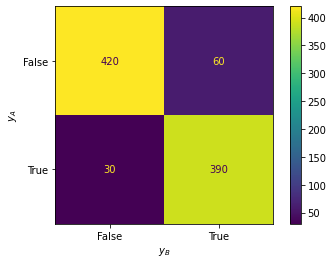

In [9]:
pred_a = clf_a.predict(X)
pred_b = clf_b.predict(X)
cm = confusion_matrix(pred_a, pred_b, labels=diff_clf.base_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=diff_clf.base_classes)
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.set_ylabel('$y_A$')
ax.set_xlabel('$y_B$')
plt.show()

For 30 instances, A predicts True and B False, whereas for 60 instances A predicts False and B True.

In [11]:
proba_a = clf_a.predict_proba(X)[:, 1]
proba_b = clf_b.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(proba_a, proba_b)

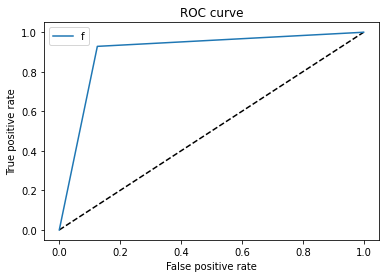

In [12]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='f')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

The ROC curve has one dominant peak, because the predicted probabilities are just 0's and 1's

In [14]:
roc_auc_score(proba_a, proba_b)

0.9017857142857143

This metric may be seen as a goodness of fit of the predictions of A to B